In [57]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#In pgmpy the colums are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

In [3]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('Enfermedad', 'Final'), ('Tratamiento', 'Final'), ('Tratamiento', 'Reaccion'),
                       ('Reaccion', 'Final')])

In [ ]:
nx.draw(model)
plt.show()

In [4]:
# Defining individual CPDs.
cpd_e = TabularCPD(variable='Enfermedad', variable_card=2, values=[[0.6, 0.4]])
cpd_tr = TabularCPD(variable='Tratamiento', variable_card=2, values=[[0.5, 0.5]])

In [5]:
# Reaccion dado tratamiento

cpd_r_tr = TabularCPD(variable='Reaccion', variable_card=2, 
                   values=[[.7,.5],
                           [.3,.5]],
                   evidence=['Tratamiento'],
                   evidence_card=[2])

In [7]:
# Final dado enfermedad, tratamiento, reaccion
cpd_f_e_tr_r = TabularCPD(variable='Final', variable_card=2, 
                   values=[[.9,0,.5,0,.1,0,.6,0],
                           [.1,1,.5,1,.9,1,.4,1]],
                  evidence=['Enfermedad', 'Tratamiento','Reaccion'],
                  evidence_card=[2, 2,2])

In [8]:
# Associating the CPDs with the network
model.add_cpds(cpd_e, cpd_tr, cpd_r_tr, cpd_f_e_tr_r)

In [9]:
# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [11]:
model.get_cpds()

[<TabularCPD representing P(Enfermedad:2) at 0x113fcd160>,
 <TabularCPD representing P(Tratamiento:2) at 0x113fcd128>,
 <TabularCPD representing P(Reaccion:2 | Tratamiento:2) at 0x113fcd048>,
 <TabularCPD representing P(Final:2 | Enfermedad:2, Tratamiento:2, Reaccion:2) at 0x1144bf160>]

In [12]:
print(model.get_cpds('Final'))

╒═════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Enfermedad  │ Enfermedad_0  │ Enfermedad_0  │ Enfermedad_0  │ Enfermedad_0  │ Enfermedad_1  │ Enfermedad_1  │ Enfermedad_1  │ Enfermedad_1  │
├─────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ Tratamiento │ Tratamiento_0 │ Tratamiento_0 │ Tratamiento_1 │ Tratamiento_1 │ Tratamiento_0 │ Tratamiento_0 │ Tratamiento_1 │ Tratamiento_1 │
├─────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ Reaccion    │ Reaccion_0    │ Reaccion_1    │ Reaccion_0    │ Reaccion_1    │ Reaccion_0    │ Reaccion_1    │ Reaccion_0    │ Reaccion_1    │
├─────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼─────────

In [14]:
# Getting the local independencies of a variable.
model.local_independencies('Reaccion')

(Reaccion _|_ Enfermedad, Final | Tratamiento)

In [ ]:
# Getting all the local independencies in the network.
model.local_independencies(['D', 'I', 'S', 'G', 'L'])

In [15]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [80]:
print(infer.query(['Final'], evidence={'Tratamiento': 1}) ['Final'])

╒═════════╤══════════════╕
│ Final   │   phi(Final) │
╞═════════╪══════════════╡
│ Final_0 │       0.2700 │
├─────────┼──────────────┤
│ Final_1 │       0.7300 │
╘═════════╧══════════════╛


In [72]:
np.random.randint(0,2)

0

In [79]:
for i in range(5):
    tr=np.random.randint(0,2)
    enf=np.random.randint(0,2)
    print(tr,enf,infer.map_query(['Reaccion','Final'],evidence={'Tratamiento': tr,'Enfermedad': enf}))

0 1 {'Reaccion': 0, 'Final': 1}
1 0 {'Reaccion': 0, 'Final': 1}
1 1 {'Reaccion': 0, 'Final': 1}
1 0 {'Reaccion': 0, 'Final': 1}
1 0 {'Reaccion': 0, 'Final': 1}


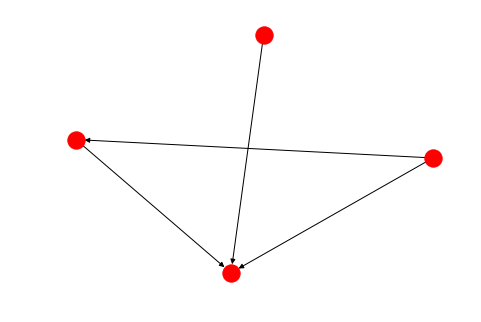

$\sum_{E,R}P(V|E,Tr,R)P(R|Tr)P(E)$

In [73]:
for i in range(5):
    print(i)

0
1
2
3
4
